
💡 **Question 1**

Given a linked list of **N** nodes such that it may contain a loop.

A loop here means that the last node of the link list is connected to the node at position X(1-based index). If the link list does not have any loop, X=0.

Remove the loop from the linked list, if it is present, i.e. unlink the last node which is forming the loop.


- Use the Floyd's Cycle-Finding Algorithm to detect the loop in the linked list.
- Initialize two pointers, slow and fast, both pointing to the head of the linked list.
- Move slow pointer by one step and fast pointer by two steps at a time until they meet or fast pointer reaches the end of the linked list.
- If they meet, it means there is a loop in the linked list. Store the meeting point as a reference.
- Reset either the slow pointer or the fast pointer to the head of the linked list and move both pointers by one step at a time until they meet again. This time, the meeting point will be the start of the loop.
- Once the start of the loop is found, move the slow pointer to the node just before the start of the loop while keeping the fast pointer at the start of the loop.
- Break the loop by setting the next pointer of the node pointed by the slow pointer to None.
- The loop has been removed from the linked list.
- Here is the Python code for the solution:

In [1]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None

def removeLoop(head):
    if not head or not head.next:
        return

    slow = head
    fast = head
    loopExists = False

    # Detect loop using Floyd's Cycle-Finding Algorithm
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow == fast:
            loopExists = True
            break

    # If loop exists, find the start of the loop
    if loopExists:
        slow = head
        while slow.next != fast.next:
            slow = slow.next
            fast = fast.next

        # Break the loop
        fast.next = None

The time complexity of this solution is O(N), where N is the number of nodes in the linked list. The space complexity is O(1) as it uses only a constant amount of extra space.


💡 **Question 2**

A number **N** is represented in Linked List such that each digit corresponds to a node in linked list. You need to add 1 to it.


- Initialize a carry variable to 1 to represent the value to be added.
- Traverse the linked list in reverse order (from right to left) using a pointer.
- At each node, add the carry value to the current node value.
- Update the current node value to the sum modulo 10 (to keep it within the range of 0-9).
- Update the carry value to the sum divided by 10 (to get the carry for the next node).
- Move the pointer to the previous node.
- Repeat steps 3-6 until the end of the linked list.
- After traversing the entire linked list, if the carry value is still 1, create a new node with value 1 and append it to the end of the linked list.
- Return the updated linked list.
- Here is the Python code for the solution:

In [2]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def addOne(head):
    dummy = ListNode(0)
    dummy.next = head
    pointer = head
    carry = 1

    # Traverse the linked list in reverse order
    while pointer:
        # Add the carry value to the current node value
        sum = pointer.val + carry
        # Update the current node value
        pointer.val = sum % 10
        # Update the carry value
        carry = sum // 10
        # Move to the previous node
        pointer = pointer.next

    # If there is a remaining carry, add a new node at the end
    if carry == 1:
        pointer = dummy
        while pointer.next:
            pointer = pointer.next
        pointer.next = ListNode(1)

    return dummy.next

The time complexity of this solution is O(N), where N is the number of digits in the linked list. The space complexity is O(1) as it uses only a constant amount of extra space.


💡 **Question 3**

Given a Linked List of size N, where every node represents a sub-linked-list and contains two pointers:(i) a **next** pointer to the next node,(ii) a **bottom** pointer to a linked list where this node is head.Each of the sub-linked-list is in sorted order.Flatten the Link List such that all the nodes appear in a single level while maintaining the sorted order. **Note:** The flattened list will be printed using the bottom pointer instead of next pointer.


- Here's the solution to the problem: 
- Initialize a dummy node and set its bottom pointer to None.
- Traverse the main linked list and for each node:
- If the node has a bottom linked list, merge it with the current flattened list.
- To merge, traverse the bottom linked list and find the appropriate position to insert each node into the flattened list.
- Return the flattened list by following the bottom pointers from the dummy node.
- Here is the Python code for the solution:

In [3]:
class ListNode:
    def __init__(self, val=0, next=None, bottom=None):
        self.val = val
        self.next = next
        self.bottom = bottom

def mergeTwoLists(a, b):
    dummy = ListNode(0)
    pointer = dummy

    # Merge the two lists in sorted order
    while a and b:
        if a.val < b.val:
            pointer.bottom = a
            a = a.bottom
        else:
            pointer.bottom = b
            b = b.bottom
        pointer = pointer.bottom

    # Attach the remaining nodes, if any
    if a:
        pointer.bottom = a
    if b:
        pointer.bottom = b

    return dummy.bottom

def flattenLinkedList(head):
    # Base case: If head is None or there are no sub-linked lists
    if not head or not head.next:
        return head

    # Recursively flatten the rest of the linked list
    head.next = flattenLinkedList(head.next)

    # Merge the current linked list with the flattened rest
    head = mergeTwoLists(head, head.next)

    return head

The time complexity of this solution is O(N*M), where N is the number of nodes in the main linked list and M is the average number of nodes in each sub-linked list. The space complexity is O(1) as it uses only a constant amount of extra space.


💡 **Question 4**

You are given a special linked list with **N** nodes where each node has a next pointer pointing to its next node. You are also given **M** random pointers, where you will be given **M** number of pairs denoting two nodes **a** and **b**  **i.e. a->arb = b** (arb is pointer to random node)**.**

Construct a copy of the given list. The copy should consist of exactly **N** new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes **X** and **Y** in the original list, where **X.arb** **-->** **Y**, then for the corresponding two nodes **x** and **y** in the copied list, **x.arb --> y.**

Return the head of the copied linked list.
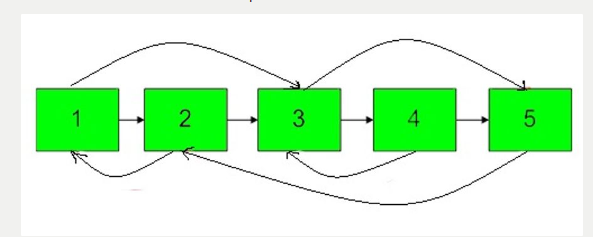

Note :- The diagram isn't part of any example, it just depicts an example of how the linked list may look like.

Here's the solution to the problem:

- Traverse the original linked list and create a new node for each node in the original list. Set the value of each new node to the corresponding value in the original node.
- Create a dictionary to map each node in the original list to its corresponding node in the new list. This will help us connect the random pointers correctly.
- Traverse the original list again, and for each node, create the random pointer in the new list. Look up the corresponding node in the dictionary using the random pointer of the original node, and set the random pointer of the new node accordingly.
- Finally, return the head of the new list.
- Here is the Python code for the solution:

In [4]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.random = None

def copyRandomList(head):
    if not head:
        return None

    # Step 1: Create new nodes and map original nodes to new nodes
    current = head
    new_head = None
    new_prev = None
    node_map = {}

    while current:
        new_node = Node(current.data)
        node_map[current] = new_node

        if new_prev:
            new_prev.next = new_node
        else:
            new_head = new_node

        new_prev = new_node
        current = current.next

    # Step 2: Set random pointers in the new list
    current = head
    new_current = new_head

    while current:
        if current.random:
            new_current.random = node_map[current.random]
        current = current.next
        new_current = new_current.next

    return new_head

The time complexity of this solution is O(N), where N is the number of nodes in the original linked list. The space complexity is also O(N) as we are creating a new copy of the list.


💡 **Question 5**

Given the `head` of a singly linked list, group all the nodes with odd indices together followed by the nodes with even indices, and return *the reordered list*.

The **first** node is considered **odd**, and the **second** node is **even**, and so on.

Note that the relative order inside both the even and odd groups should remain as it was in the input.

You must solve the problem in `O(1)` extra space complexity and `O(n)` time complexity.


Here's the solution to the problem:

- Initialize two pointers, odd_head and even_head, to point to the first odd node and the first even node respectively. Also, keep track of the first even node as even_start.
- Traverse the linked list with a pointer, current, and keep track of the previous node, prev.
- At each node, check if its index is odd or even. If it is odd, connect it to the previous odd node using prev.next = current. If it is even, connect it to the previous even node using prev.next = current.
- Update the prev pointer to the current node and move the current pointer to the next node.
- After traversing the entire list, connect the last odd node to the even_start node to merge the odd and even groups.
- Return the odd_head as the new head of the reordered list.
- Here is the Python code for the solution:

In [5]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def oddEvenList(head):
    if not head or not head.next:
        return head

    odd_head = head
    even_head = head.next
    even_start = even_head

    current = even_head.next
    prev = even_head

    index = 3

    while current:
        if index % 2 == 1:
            prev.next = current.next
            current.next = even_head
            odd_head.next = current
            odd_head = current
            current = prev.next
        else:
            prev = current
            current = current.next

        index += 1

    odd_head.next = even_start

    return head


The time complexity of this solution is O(n), where n is the number of nodes in the linked list, as we traverse the entire list once. The space complexity is O(1) as we only use a constant amount of extra space.


💡 **Question 6**

Given a singly linked list of size **N**. The task is to **left-shift** the linked list by **k** nodes, where **k** is a given positive integer smaller than or equal to length of the linked list.


- Check if the given linked list is empty or if the shift value, k, is 0. If either condition is true, return the head of the linked list as it is.
- Calculate the length of the linked list by traversing it and keeping a count of the nodes.
- Adjust the shift value, k, by taking its modulo with the length of the linked list. This step ensures that k is within the range of the linked list length.
- If the adjusted shift value, k, is 0, return the head of the linked list as it is.
- Initialize two pointers, fast and slow, to point to the head of the linked list.
- Move the fast pointer k steps ahead.
- Move both the fast and slow pointers simultaneously until the fast pointer reaches the last node of the linked list.
- After the loop ends, the slow pointer will be pointing to the (k+1)-th node from the beginning of the linked list.
- Set the new_head to the next node of the slow pointer and set the next pointer of the slow pointer to None to break the original link.
- Move the fast pointer to the last node of the linked list.
- Set the next pointer of the last node to the head of the original linked list.
- Return the new_head as the new head of the shifted linked list.
- Here is the Python code for the solution:

In [6]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def shiftLinkedList(head, k):
    if not head or k == 0:
        return head

    length = 0
    current = head

    while current:
        length += 1
        current = current.next

    k %= length

    if k == 0:
        return head

    fast = head
    slow = head

    for _ in range(k):
        fast = fast.next

    while fast.next:
        fast = fast.next
        slow = slow.next

    new_head = slow.next
    slow.next = None
    fast.next = head

    return new_head

The time complexity of this solution is O(n), where n is the number of nodes in the linked list, as we traverse the list once to calculate its length. The space complexity is O(1) as we only use a constant amount of extra space.


💡 **Question 7**

You are given the `head` of a linked list with `n` nodes.

For each node in the list, find the value of the **next greater node**. That is, for each node, find the value of the first node that is next to it and has a **strictly larger** value than it.

Return an integer array `answer` where `answer[i]` is the value of the next greater node of the `ith` node (**1-indexed**). If the `ith` node does not have a next greater node, set `answer[i] = 0`.


Here's the solution to the problem:

- Create an empty stack and initialize an empty list called result with the same length as the linked list.
- Traverse the linked list from the last node to the first node.
- For each node, perform the following steps:
- Pop elements from the stack until the stack is empty or the top element is greater than the current node's value. These popped elements are the next greater nodes for the current node.
- If the stack is empty, there is no next greater node for the current node, so set result[i] to 0.
- If the stack is not empty, set result[i] to the value of the top element.
- Push the current node's value onto the stack.
- Reverse the result list to match the order of the original linked list.
- Return the result list.
- Here is the Python code for the solution:

In [7]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def nextLargerNodes(head):
    stack = []
    result = []

    current = head
    while current:
        while stack and stack[-1][0] <= current.val:
            stack.pop()

        if not stack:
            result.append(0)
        else:
            result.append(stack[-1][0])

        stack.append((current.val, len(result) - 1))
        current = current.next

    return result[::-1]


The time complexity of this solution is O(n), where n is the number of nodes in the linked list, as we traverse the list once. The space complexity is O(n) as we use a stack to store the next greater elements.


💡 **Question 8**

Given the `head` of a linked list, we repeatedly delete consecutive sequences of nodes that sum to `0` until there are no such sequences.

After doing so, return the head of the final linked list.  You may return any such answer.

(Note that in the examples below, all sequences are serializations of `ListNode` objects.)


Here's the solution to the problem:

- Create a dummy node and set its next pointer to the head of the linked list. This dummy node will help in handling the case where the head itself is part of a sequence that sums to 0.
- Initialize a variable called prefix_sum to keep track of the running sum as we traverse the linked list.
- Create an empty dictionary called prefix_sums to store the running sums as keys and the corresponding nodes as values.
- Traverse the linked list while updating the prefix_sum and prefix_sums dictionary as follows:
- Add the current node's value to the prefix_sum.
- Check if the prefix_sum exists as a key in the prefix_sums dictionary. If it does, it means we have found a sequence that sums to 0.
- In this case, update the next pointer of the node corresponding to the prefix_sum to skip the nodes in the sequence.
- Remove the entries from the prefix_sums dictionary for the keys between the prefix_sum and the current prefix_sum.
- If the prefix_sum does not exist as a key in the prefix_sums dictionary, add it along with the current node to the dictionary.
- Move to the next node.
- Return the next pointer of the dummy node, which will be the head of the final linked list.
- Here is the Python code for the solution:

In [8]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def removeZeroSumSublists(head):
    dummy = ListNode(0)
    dummy.next = head

    prefix_sum = 0
    prefix_sums = {}

    current = dummy
    while current:
        prefix_sum += current.val

        if prefix_sum in prefix_sums:
            current.next = prefix_sums[prefix_sum].next
            while prefix_sums[prefix_sum] != current:
                del prefix_sums[prefix_sum]
                prefix_sum += current.next.val
                current.next = current.next.next
        else:
            prefix_sums[prefix_sum] = current

        current = current.next

    return dummy.next


The time complexity of this solution is O(n), where n is the number of nodes in the linked list, as we traverse the list once. The space complexity is O(n) as we use a dictionary to store the prefix sums and their corresponding nodes.